### Exploratory Data Analysis: % of individuals using the internet

Years: 2000, 2005, 2010 ,2015, 2019 ,2020, 2021

Data source: [UN](https://data.un.org/)

Data URL: [Internet Usage Data](https://data.un.org/_Docs/SYB/CSV/SYB66_314_202310_Internet%20Usage.csv)

Objective: Exploratory data analysis to detect anomalies, identify patterns, understand the data, and identify preliminary insights from the data using quantitative and graphical methods.

1) Understand the dataset.
2) Define analytics objectives or questions.
3) Understand the attributes/variables, their types, relevance and significance, and their relationships.
4) Prepare and clean the dataset in readiness for analytics.
5) Perform exploratory data analysis
6) Communicate insights.

### Preliminary Questions

- How has the global percentage of individuals using the internet changed over time?
- Which regions or countries have shown the most significant increase in internet usage?
- Are there any noticeable patterns or trends in internet adoption rates across different geographical areas?
- What is the average internet usage percentage for all countries?
- How does internet usage compare between developed and developing countries?
- Are there any countries or regions that show unusually high or low internet adoption rates compared to their neighbors or global averages?
- What is the rate of growth in internet usage for different time periods (e.g., 2000-2005, 2005-2010, 2010-2015)?
- Is there a correlation between a country's economic status and its internet usage percentage?
- How does the data distribution of internet usage percentages change over the years?
- Are there any notable outliers in terms of internet usage, and what factors might contribute to their exceptional status?

### Python Libraries

In [1]:
# package importation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
# create a list of column names for the dataset
dataset_columns = ["idx", "region_country_area", "year", "series", "value", "footnotes","source"]


# read the dataset into a pandas dataframe
internet_usage = pd.read_csv('InternetUsage.csv', skiprows=1, encoding='ISO-8859-1')

# set the column names
internet_usage.columns = dataset_columns

# display the first 5 rows of the dataset
internet_usage.head()

,idx,region_country_area,year,series,value,footnotes,source
0,1,"Total, all countries or areas",2000,Percentage of individuals using the internet,5.3,NaN,"International Telecommunication Union (ITU), G..."
1,1,"Total, all countries or areas",2005,Percentage of individuals using the internet,15.6,NaN,"International Telecommunication Union (ITU), G..."
2,1,"Total, all countries or areas",2010,Percentage of individuals using the internet,28.5,NaN,"International Telecommunication Union (ITU), G..."
3,1,"Total, all countries or areas",2015,Percentage of individuals using the internet,40.0,NaN,"International Telecommunication Union (ITU), G..."
4,1,"Total, all countries or areas",2019,Percentage of individuals using the internet,53.7,NaN,"International Telecommunication Union (ITU), G..."


### Check datatypes and identify useful columns 

<pre>
Attributes              Description
idx                     int64: used for identifying the country region or area
region_country_area     text: used to identify a country, region, area or group of countries
year                    int64: the year the value represent
series                  text: descriptive column
value                   float: percentage of individuals using internet
footnotes               text: descriptive column
source                  text: descriptive column
</pre>


<pre>
Total records: 1528
significant fields: idx, region_country_area, year, value
</pre>

In [3]:
internet_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idx                  1528 non-null   int64  
 1   region_country_area  1528 non-null   object 
 2   year                 1528 non-null   int64  
 3   series               1528 non-null   object 
 4   value                1528 non-null   float64
 5   footnotes            966 non-null    object 
 6   source               1528 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 83.7+ KB


### Drop columns not useful for analysis

In [4]:
internet_usage.drop(columns=['series', 'footnotes', 'source'], inplace=True)

internet_usage.head()

,idx,region_country_area,year,value
0,1,"Total, all countries or areas",2000,5.3
1,1,"Total, all countries or areas",2005,15.6
2,1,"Total, all countries or areas",2010,28.5
3,1,"Total, all countries or areas",2015,40.0
4,1,"Total, all countries or areas",2019,53.7


### Drop LDC§ records from the dataset, not needed

In [5]:
# drop LDC§ records from the dataset, idx = 199

print(internet_usage[internet_usage['idx'] == 199])

ldc_index = internet_usage[internet_usage['idx'] == 199].index
internet_usage.drop(ldc_index, inplace=True)

# check if the LDC records have been dropped
if not internet_usage[internet_usage['idx'] == 199].empty:
    print("LDC records still exist")
else:
    print("LDC records have been dropped")


      idx region_country_area  year  value
1521  199                LDC§  2000    0.4
1522  199                LDC§  2005    0.7
1523  199                LDC§  2010    3.3
1524  199                LDC§  2015   10.7
1525  199                LDC§  2019   23.5
1526  199                LDC§  2020   27.6
1527  199                LDC§  2021   31.2
LDC records have been dropped


### Check for missing values 

There are no missing values in the dataset using is null, we will proceed to check the value column for value that are = 0

In [6]:
internet_usage.isnull().sum()

idx                    0
region_country_area    0
year                   0
value                  0
dtype: int64

13 of the records has internet usage to be zero, this might be due to missing data for those specific counrt/region/area in the specified year. 11 out of 13 of this records are for Year 2000, further research can be made to find out why

In [7]:
# check for missing values in the dataset when value is 0
internet_usage_is_zero = internet_usage[internet_usage['value'] == 0]

print(internet_usage_is_zero.shape[0])

internet_usage_is_zero

13


,idx,region_country_area,year,value
352,116,Cambodia,2000,0.0
383,148,Chad,2000,0.0
432,178,Congo,2000,0.0
482,408,Dem. People's Rep. Korea,2000,0.0
483,408,Dem. People's Rep. Korea,2005,0.0
484,408,Dem. People's Rep. Korea,2010,0.0
485,180,Dem. Rep. of the Congo,2000,0.0
568,231,Ethiopia,2000,0.0
864,430,Liberia,2000,0.0
1046,562,Niger,2000,0.0


### Extract country related data and region data

In [8]:
region_values = [
    "Total, all countries or areas", "Northern Africa", "Sub-Saharan Africa", 
    "Eastern Africa", "Middle Africa", "Southern Africa", "Western Africa", 
    "Northern America", "Latin America & the Caribbean", "Caribbean", 
    "Central Asia", "Eastern Asia", "South-central Asia", 
    "South-eastern Asia", "Southern Asia", "Western Asia", 
    "Europe", "Oceania", "Australia and New Zealand", "Micronesia"
]

region_internet_usage = internet_usage[internet_usage['region_country_area'].isin(region_values)]

country_internet_usage = internet_usage[~internet_usage['region_country_area'].isin(region_values)]

# print shapes of the region and country dataframes

print("Region dataframe shape: ", region_internet_usage.shape)
print("Total records in region dataframe: ", region_internet_usage.shape[0])
print()
print("Country dataframe shape: ", country_internet_usage.shape)
print("Total records in country dataframe: ", country_internet_usage.shape[0])



Region dataframe shape:  (139, 4)
Total records in region dataframe:  139

Country dataframe shape:  (1382, 4)
Total records in country dataframe:  1382


## Statistics and Distribution of Country and Region Data

# Country Statistics
<pre>
The dataset has total countries for 221 - due to sub group in some countries 

For all 221 countries the dataset contains 1,382 observations of internet usage percentages across all countries and years.

On average, internet usage is 43.27, with a substantial variation indicated by a standard deviation of 32.79.

The minimum recorded internet usage is 0%, suggesting that some countries had no internet access during certain years or possibilitiy of missing record for such years, while the maximum is 100%, indicating full internet penetration in other countries. 

The distribution shows that 25% of the countries had an internet usage of 10% or less, while the median is 40.9%, meaning half of the countries had internet usage below this value. 

Additionally, 75% of the countries had an internet usage percentage of up to 74.58%, highlighting a significant disparity in internet access across different regions and time periods.
</pre>

In [9]:
# unique values in the region_country_area column

county_counts = len(country_internet_usage['region_country_area'].unique())

print("Unique countries in the dataset: ", county_counts)



Unique countries in the dataset:  221


In [10]:
country_internet_usage["value"].describe()

count    1382.000000
mean       43.271418
std        32.794155
min         0.000000
25%        10.000000
50%        40.900000
75%        74.575000
max       100.000000
Name: value, dtype: float64

In [11]:
# countries with full internet access
full_internet_access = country_internet_usage[country_internet_usage['value'] == 100]

print("Countries with full internet access: ", full_internet_access.shape[0])

full_internet_access

Countries with full internet access:  5


,idx,region_country_area,year,value
235,48,Bahrain,2021,100.0
1157,634,Qatar,2021,100.0
1244,682,Saudi Arabia,2021,100.0
1441,784,United Arab Emirates,2020,100.0
1442,784,United Arab Emirates,2021,100.0


In [12]:
# countries with no internet access
no_internet_access = country_internet_usage[country_internet_usage['value'] == 0]

print("Countries with no internet access: ", no_internet_access.shape[0])

no_internet_access

Countries with no internet access:  13


,idx,region_country_area,year,value
352,116,Cambodia,2000,0.0
383,148,Chad,2000,0.0
432,178,Congo,2000,0.0
482,408,Dem. People's Rep. Korea,2000,0.0
483,408,Dem. People's Rep. Korea,2005,0.0
484,408,Dem. People's Rep. Korea,2010,0.0
485,180,Dem. Rep. of the Congo,2000,0.0
568,231,Ethiopia,2000,0.0
864,430,Liberia,2000,0.0
1046,562,Niger,2000,0.0


## Distribution of countries internet usage 

The data is spread across almost all the entire spectrum, reflecting a broad range of internet adoption rates globally. This aligns with the summary statistics, where the mean internet usage is 43.27%, but with a large standard deviation (32.79%), indicating substantial variation between countries.

While there is a wide variation in internet access globally, many countries are clustered around moderate levels of usage.


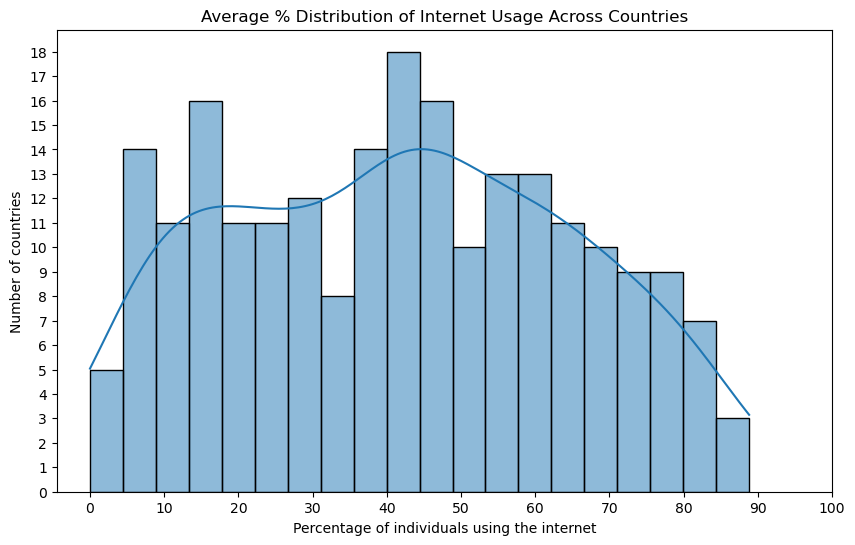

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(country_internet_usage.groupby('region_country_area')['value'].mean(), kde=True, bins=20)
plt.yticks(range(0, 19))
plt.xticks(range(0, 110, 10))
plt.title("Average % Distribution of Internet Usage Across Countries")
plt.xlabel("Percentage of individuals using the internet")
plt.ylabel("Number of countries")
plt.show()

## Overall Average internet Usage Yearly

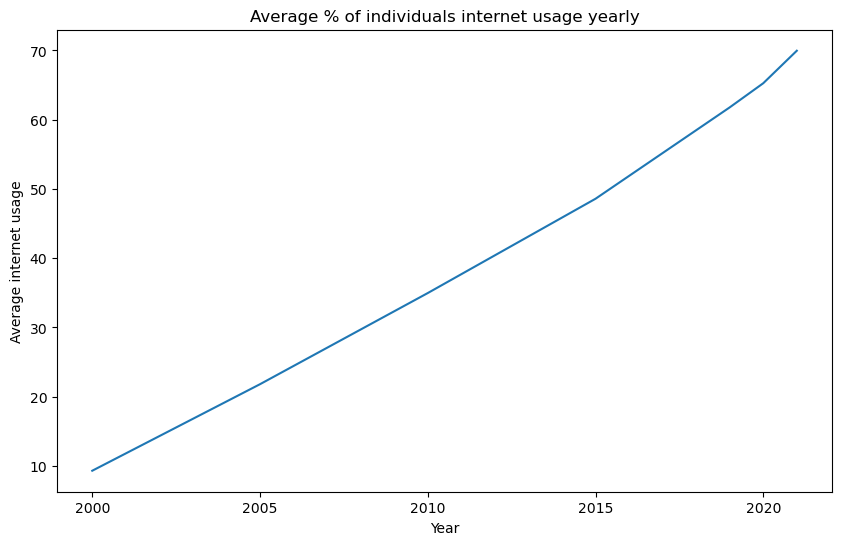

In [14]:
plt.figure(figsize=(10, 6))
country_internet_usage.groupby('year')['value'].mean().plot(kind='line')
plt.title("Average % of individuals internet usage yearly")
plt.xlabel("Year")
plt.ylabel("Average internet usage")
plt.show()


year
2000           NaN
2005    133.970930
2010     60.316277
2015     38.924694
2019     27.153062
2020      5.645828
2021      7.190069
Name: value, dtype: float64


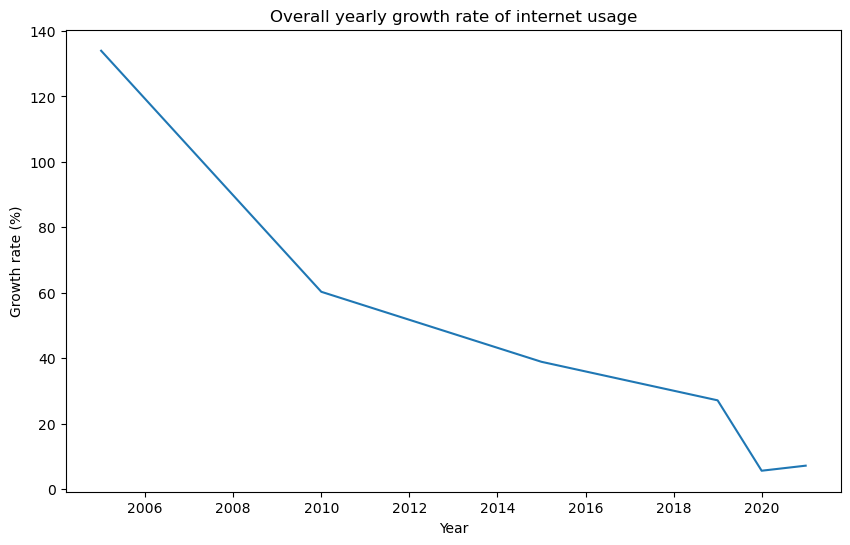

In [39]:
# overall yearly growth rate of internet usage
overall_internet_usage_growth = country_internet_usage.groupby('year')['value'].mean().pct_change() * 100


print(overall_internet_usage_growth)

# set the first value to 0
# overall_internet_usage_growth[2000] = 0

# plot the overall yearly growth rate of internet usage
plt.figure(figsize=(10, 6))
overall_internet_usage_growth.plot(kind='line')
plt.title("Overall yearly growth rate of internet usage")
plt.xlabel("Year")
plt.ylabel("Growth rate (%)")
plt.show()


In [16]:
# copy dataset to a new dataframe
country_internet_usage_growth_rate_df = country_internet_usage.copy()


# sort by country and year
country_internet_usage_growth_rate_df.sort_values(['region_country_area', 'year'], inplace=True)


# calculate the growth rate of internet usage in each country
country_internet_usage_growth_rate_df.loc[:, 'growth_rate'] = country_internet_usage_growth_rate_df.groupby('region_country_area')['value'].pct_change()



# print inf values
print(country_internet_usage_growth_rate_df[country_internet_usage_growth_rate_df['growth_rate'] == float('inf')])

# drop inf values
country_internet_usage_growth_rate_df.drop(country_internet_usage_growth_rate_df[country_internet_usage_growth_rate_df['growth_rate'] == float('inf')].index, inplace=True)


# countries with the highest growth rate of internet usage
highest_growth_rate = country_internet_usage_growth_rate_df.groupby('region_country_area')['growth_rate'].mean().nlargest(10).reset_index()


# lowest growth rate of internet usage
lowest_growth_rate = country_internet_usage_growth_rate_df.groupby('region_country_area')['growth_rate'].mean().nsmallest(10).reset_index()



      idx     region_country_area  year  value  growth_rate
353   116                Cambodia  2005    0.3          inf
384   148                    Chad  2005    0.4          inf
433   178                   Congo  2005    1.5          inf
486   180  Dem. Rep. of the Congo  2005    0.2          inf
569   231                Ethiopia  2005    0.2          inf
865   430                 Liberia  2010    2.3          inf
1047  562                   Niger  2005    0.2          inf
1300  706                 Somalia  2005    1.1          inf
1331  729                   Sudan  2005    1.3          inf
1362  762              Tajikistan  2005    0.3          inf


In [17]:
# print countries with the highest growth rate
print("First 10 countries with the highest growth rate")
print(tabulate(highest_growth_rate, headers=['Country', 'Growth Rate'], floatfmt=".2f"))

print()

# print countries with the lowest growth rate
print("First 10 countries with the lowest growth rate")
print(tabulate(lowest_growth_rate, headers=['Country', 'Growth Rate'], floatfmt=".2f"))

First 10 countries with the highest growth rate
    Country        Growth Rate
--  -----------  -------------
 0  Tajikistan           19.15
 1  Azerbaijan           14.09
 2  Albania              11.02
 3  Libya                10.54
 4  Sudan                 9.51
 5  Myanmar               7.91
 6  Viet Nam              7.30
 7  Yemen                 7.11
 8  Timor-Leste           7.02
 9  Nigeria               6.41

First 10 countries with the lowest growth rate
    Country                     Growth Rate
--  ------------------------  -------------
 0  Nauru                              0.06
 1  Canada                             0.11
 2  San Marino                         0.12
 3  Norway                             0.13
 4  New Zealand                        0.13
 5  Australia                          0.13
 6  Switzerland                        0.14
 7  Monaco                             0.14
 8  United States of America           0.15
 9  Sweden                             0.15


<Figure size 2000x2000 with 0 Axes>

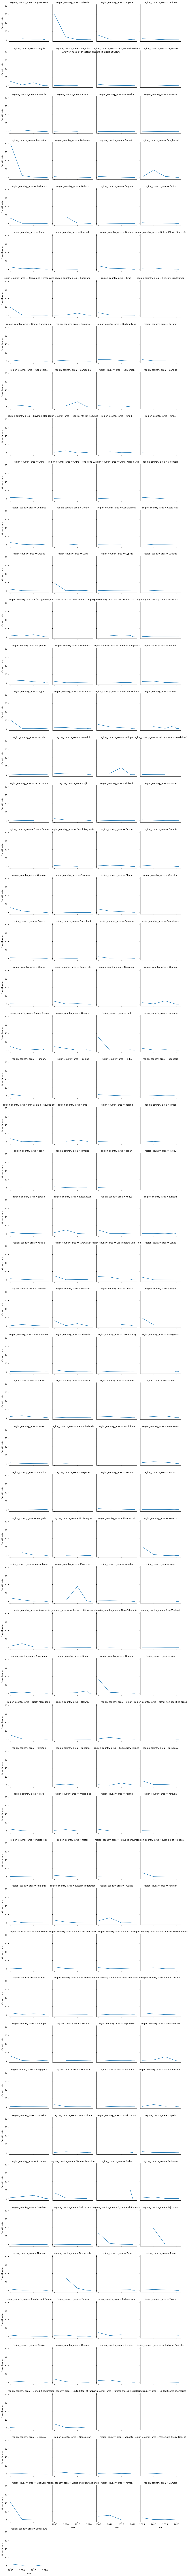

In [18]:

plt.figure(figsize=(20, 20))
g = sns.FacetGrid(country_internet_usage_growth_rate_df, col="region_country_area", col_wrap=4, height=3)
g.map(sns.lineplot, "year", "growth_rate")
# plt.subplots_adjust(top=0.9)
g.figure.suptitle("Growth rate of internet usage in each country")
g.set_axis_labels("Year", "Growth rate")
plt.show()


<Figure size 1000x600 with 0 Axes>

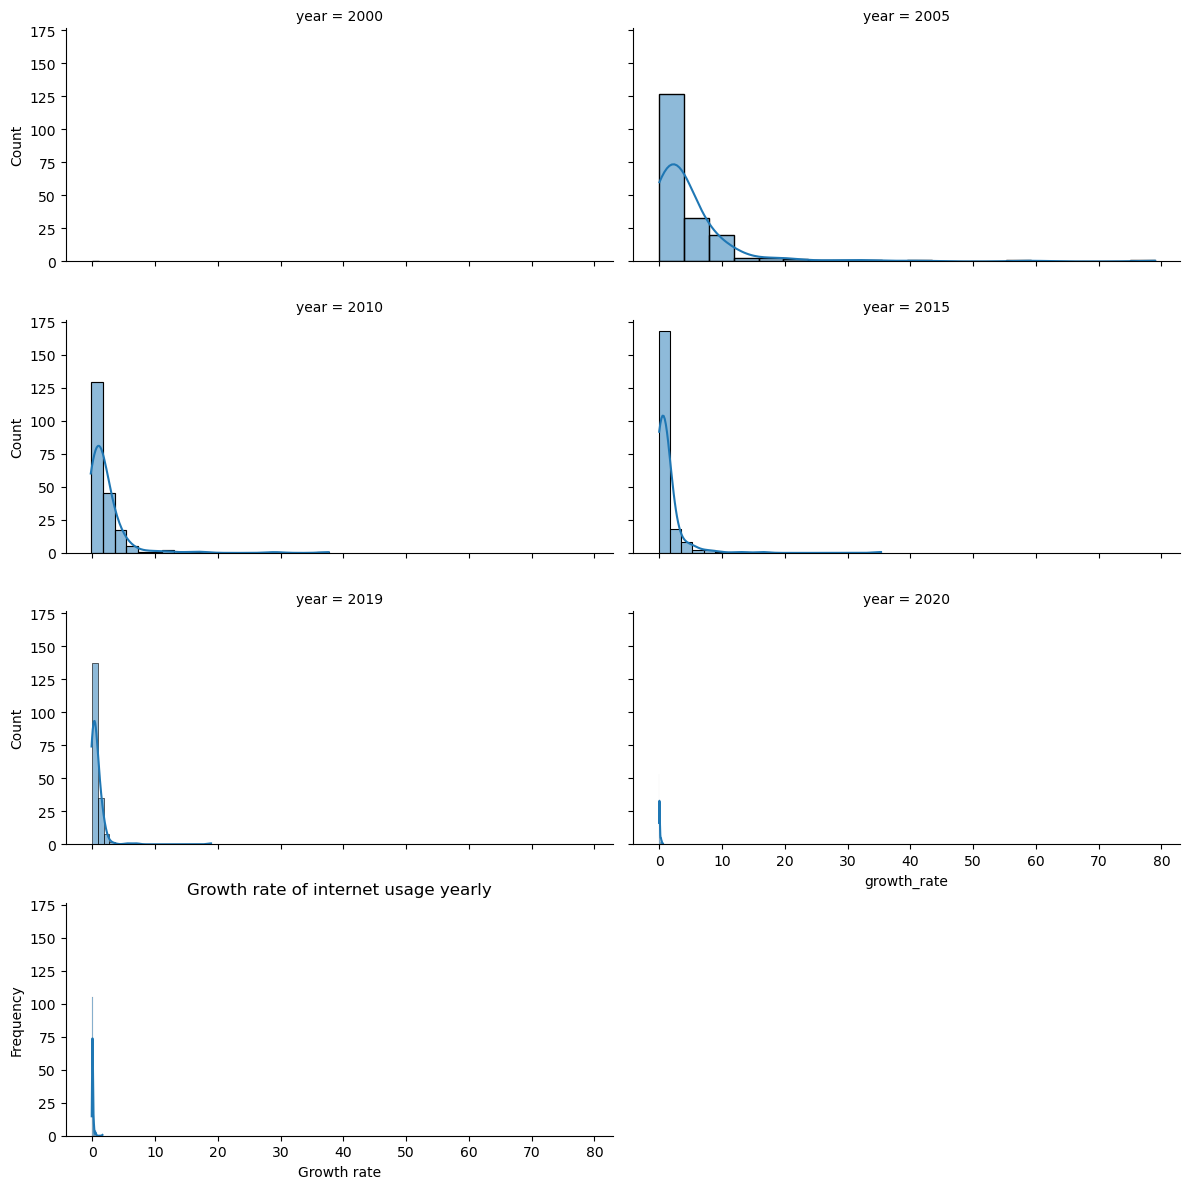

In [ ]:
# plot histogram of growth rate of internet usage yearly
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(country_internet_usage_growth_rate_df, col="year", col_wrap=2, height=3, aspect=2)
g.map(sns.histplot, "growth_rate", kde=True, bins=20)

plt.title("Growth rate of internet usage yearly")
plt.xlabel("Growth rate")
plt.ylabel("Frequency")
plt.show()


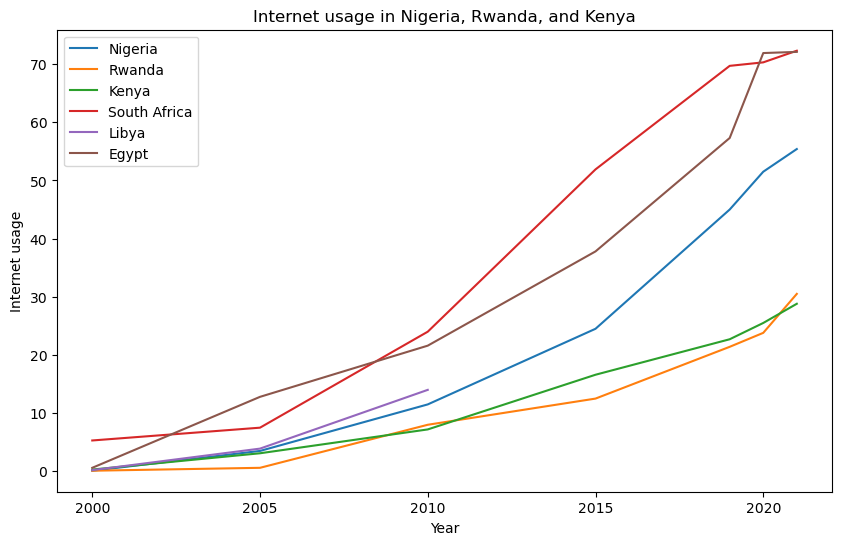

In [44]:
# compare internet usage in Nigeria, Rwanda, and Kenya
nigeria_internet_usage = country_internet_usage[country_internet_usage['region_country_area'] == 'Nigeria']
rwanda_internet_usage = country_internet_usage[country_internet_usage['region_country_area'] == 'Rwanda']
kenya_internet_usage = country_internet_usage[country_internet_usage['region_country_area'] == 'Kenya']
south_africa_internet_usage = country_internet_usage[country_internet_usage['region_country_area'] == 'South Africa']
libya_internet_usage = country_internet_usage[country_internet_usage['region_country_area'] == 'Libya']
egypt_internet_usage = country_internet_usage[country_internet_usage['region_country_area'] == 'Egypt']


plt.figure(figsize=(10, 6))
sns.lineplot(data=nigeria_internet_usage, x='year', y='value', label='Nigeria')
sns.lineplot(data=rwanda_internet_usage, x='year', y='value', label='Rwanda')
sns.lineplot(data=kenya_internet_usage, x='year', y='value', label='Kenya')
sns.lineplot(data=south_africa_internet_usage, x='year', y='value', label='South Africa')
sns.lineplot(data=libya_internet_usage, x='year', y='value', label='Libya')
sns.lineplot(data=egypt_internet_usage, x='year', y='value', label='Egypt')

plt.title("Internet usage in Nigeria, Rwanda, and Kenya")
plt.xlabel("Year")
plt.ylabel("Internet usage")
plt.legend()
plt.show()


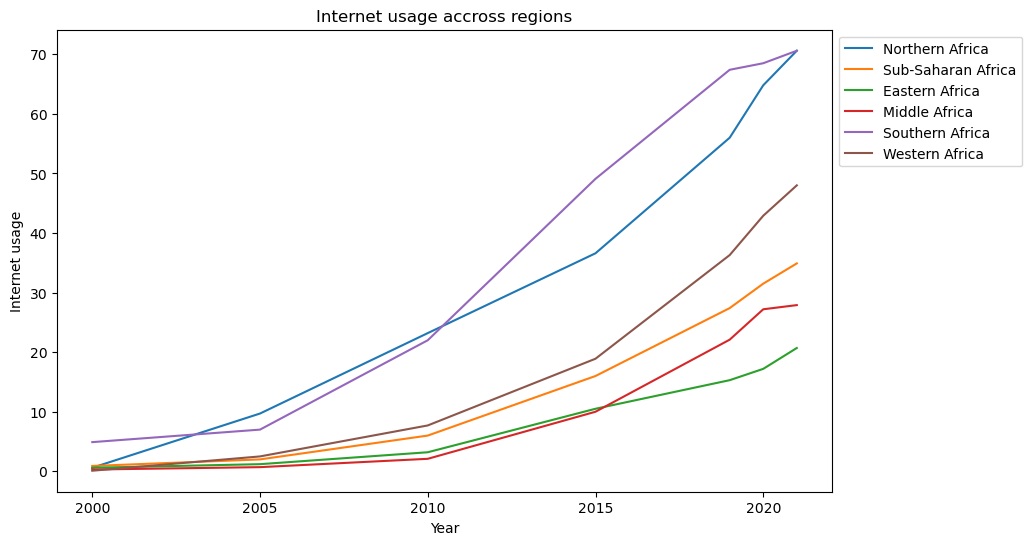

In [ ]:
africa_regions = region_internet_usage[region_internet_usage['region_country_area'].str.contains('Africa')]

plt.figure(figsize=(10, 6))
sns.lineplot(data=africa_regions, x='year', y='value', hue='region_country_area')
plt.title("Internet usage accross regions")
plt.xlabel("Year")
plt.ylabel("Internet usage")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

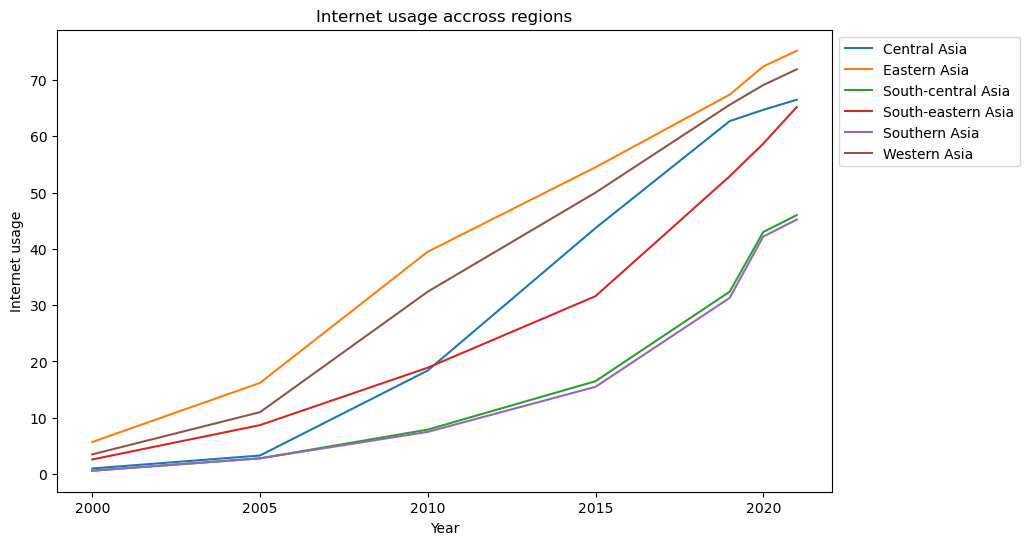

In [25]:
asia_regions = region_internet_usage[region_internet_usage['region_country_area'].str.contains('Asia')]

plt.figure(figsize=(10, 6))
sns.lineplot(data=asia_regions, x='year', y='value', hue='region_country_area')
plt.title("Internet usage accross regions")
plt.xlabel("Year")
plt.ylabel("Internet usage")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


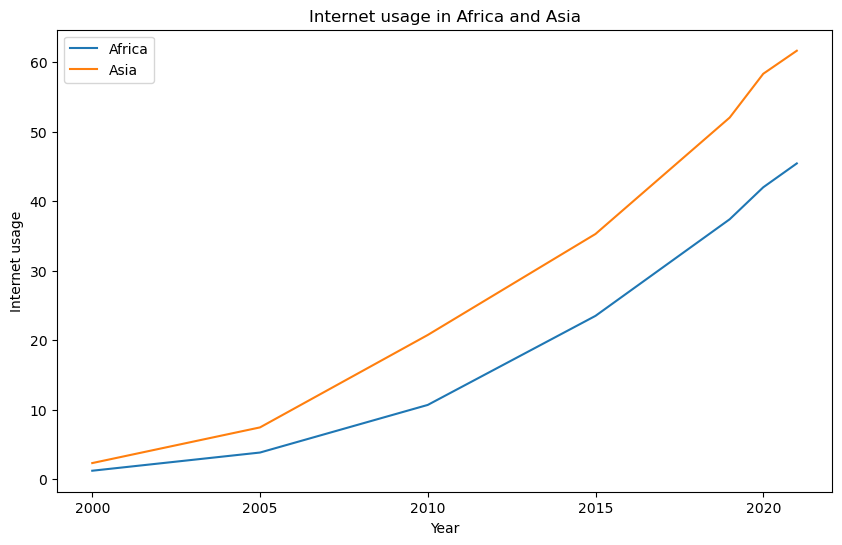

In [27]:
# compare internet usage in Africa and Asia

plt.figure(figsize=(10, 6))
sns.lineplot(data=africa_regions, x='year', y='value', label='Africa', ci=None)
sns.lineplot(data=asia_regions, x='year', y='value', label='Asia', ci=None)
plt.title("Internet usage in Africa and Asia")
plt.xlabel("Year")
plt.ylabel("Internet usage")
plt.legend()
plt.show()


## Questions answers 